In [1]:
import pandas as pd 
import seaborn as sns

In [16]:
def get_svm_df():
    # read in data 
    correct_results = [float(x) for x in open('svm/correct.txt','r').read().split(',')]
    predicted_results = [float(x) for x in open('svm/predicted.txt','r').read().split(',')]
    
    # df where x is either pos/neg and y is value of in predicted results 
    correct_results_str = ['Positive' if x>0 else 'Negative' for x in correct_results]

    is_correct = [True if (correct_results[i]*predicted_results[i] > 0) else False for i in range(0, len(correct_results))]

    # intialise data of lists. 
    svm_data = {'prediction': predicted_results ,'classification': correct_results_str, 'is_correct':is_correct, 'classifier': 'BoW'} 

    # # Create DataFrame 
    svm_data_df = pd.DataFrame(svm_data)
    
    return svm_data_df

In [15]:
def get_svm_doc2vec_df():
    # read in data 
    correct_results = [float(x) for x in open('svmdoc2vec/correct.txt','r').read().split(',')]
    predicted_results = [float(x) for x in open('svmdoc2vec/predicted.txt','r').read().split(',')]
    
    # df where x is either pos/neg and y is value of in predicted results 
    correct_results_str = ['Positive' if x>0 else 'Negative' for x in correct_results]

    is_correct = [True if (correct_results[i]*predicted_results[i] > 0) else False for i in range(0, len(correct_results))]

    # intialise data of lists. 
    svm_data = {'prediction': predicted_results ,'classification': correct_results_str, 'is_correct':is_correct, 'classifier': 'doc2vec'} 

    # # Create DataFrame 
    svm_data_df = pd.DataFrame(svm_data)
    
    return svm_data_df

In [17]:
svmd2v_df = get_svm_doc2vec_df()
svm_df = get_svm_df()

In [18]:
frames = [svm_df, svmd2v_df]
alldata_df = pd.concat(frames)

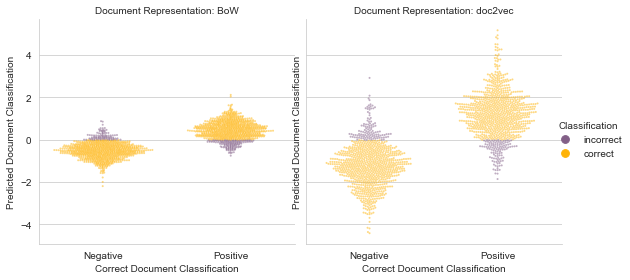

In [86]:
# set colour palette
colors = ["dusty purple", "amber", "windows blue", "greyish", "faded green"]
sns.set_palette(sns.xkcd_palette(colors))
# sns.set_palette("PRGn_r")

# grid background
sns.set_style("whitegrid")

s = sns.catplot(x="classification", y="prediction", kind="swarm", hue="is_correct",  data=alldata_df, col='classifier', height=4, alpha=0.5, s=2, legend_out = True);
# s.fig.suptitle("Err")

# edit legend
s._legend.set_title("Classification")
# replace labels
new_labels = ['incorrect', 'correct']
for t, l in zip(s._legend.texts, new_labels): t.set_text(l)

s.set_titles("Document Representation: {col_name}")
s.set(xlabel="Correct Document Classification",
     ylabel="Predicted Document Classification")

In [81]:
s.savefig("output2.png")